In [2]:
import pygmt
import numpy as np
import pandas as pd

In [3]:
#Some initialzation for pyGMT
# define the map (study) extents
min_lon = -82
max_lon = -66
min_lat = -5
max_lat = 14
# read in the topograpy for generating background map
grid = pygmt.datasets.load_earth_relief(region=[min_lon,max_lon,min_lat,max_lat],resolution='15s')

In [4]:
colombia_stations = 'Colombia-Noise.csv'
ecuador_stations = 'Ecuador-Noise.csv'
colombia_seismic_stations = 'Colombia-Seismic.csv'
ecuador_seismic_stations = 'Ecuador-Seismic.csv'
earthquakes_file = 'Earthquakes.csv'
cities_file = 'Cities.csv'

In [5]:
# Read in station locations and noise for each station
dfE = pd.read_csv(ecuador_stations)
dfC = pd.read_csv(colombia_stations)
frames = [dfC, dfE ]
df = pd.concat(frames)
dfSC = pd.read_csv(colombia_seismic_stations)
dfSE = pd.read_csv(ecuador_seismic_stations)
Sframes = [dfSC, dfSE]
dfS = pd.concat(Sframes)
eqs = pd.read_csv(earthquakes_file)
cities = pd.read_csv(cities_file)

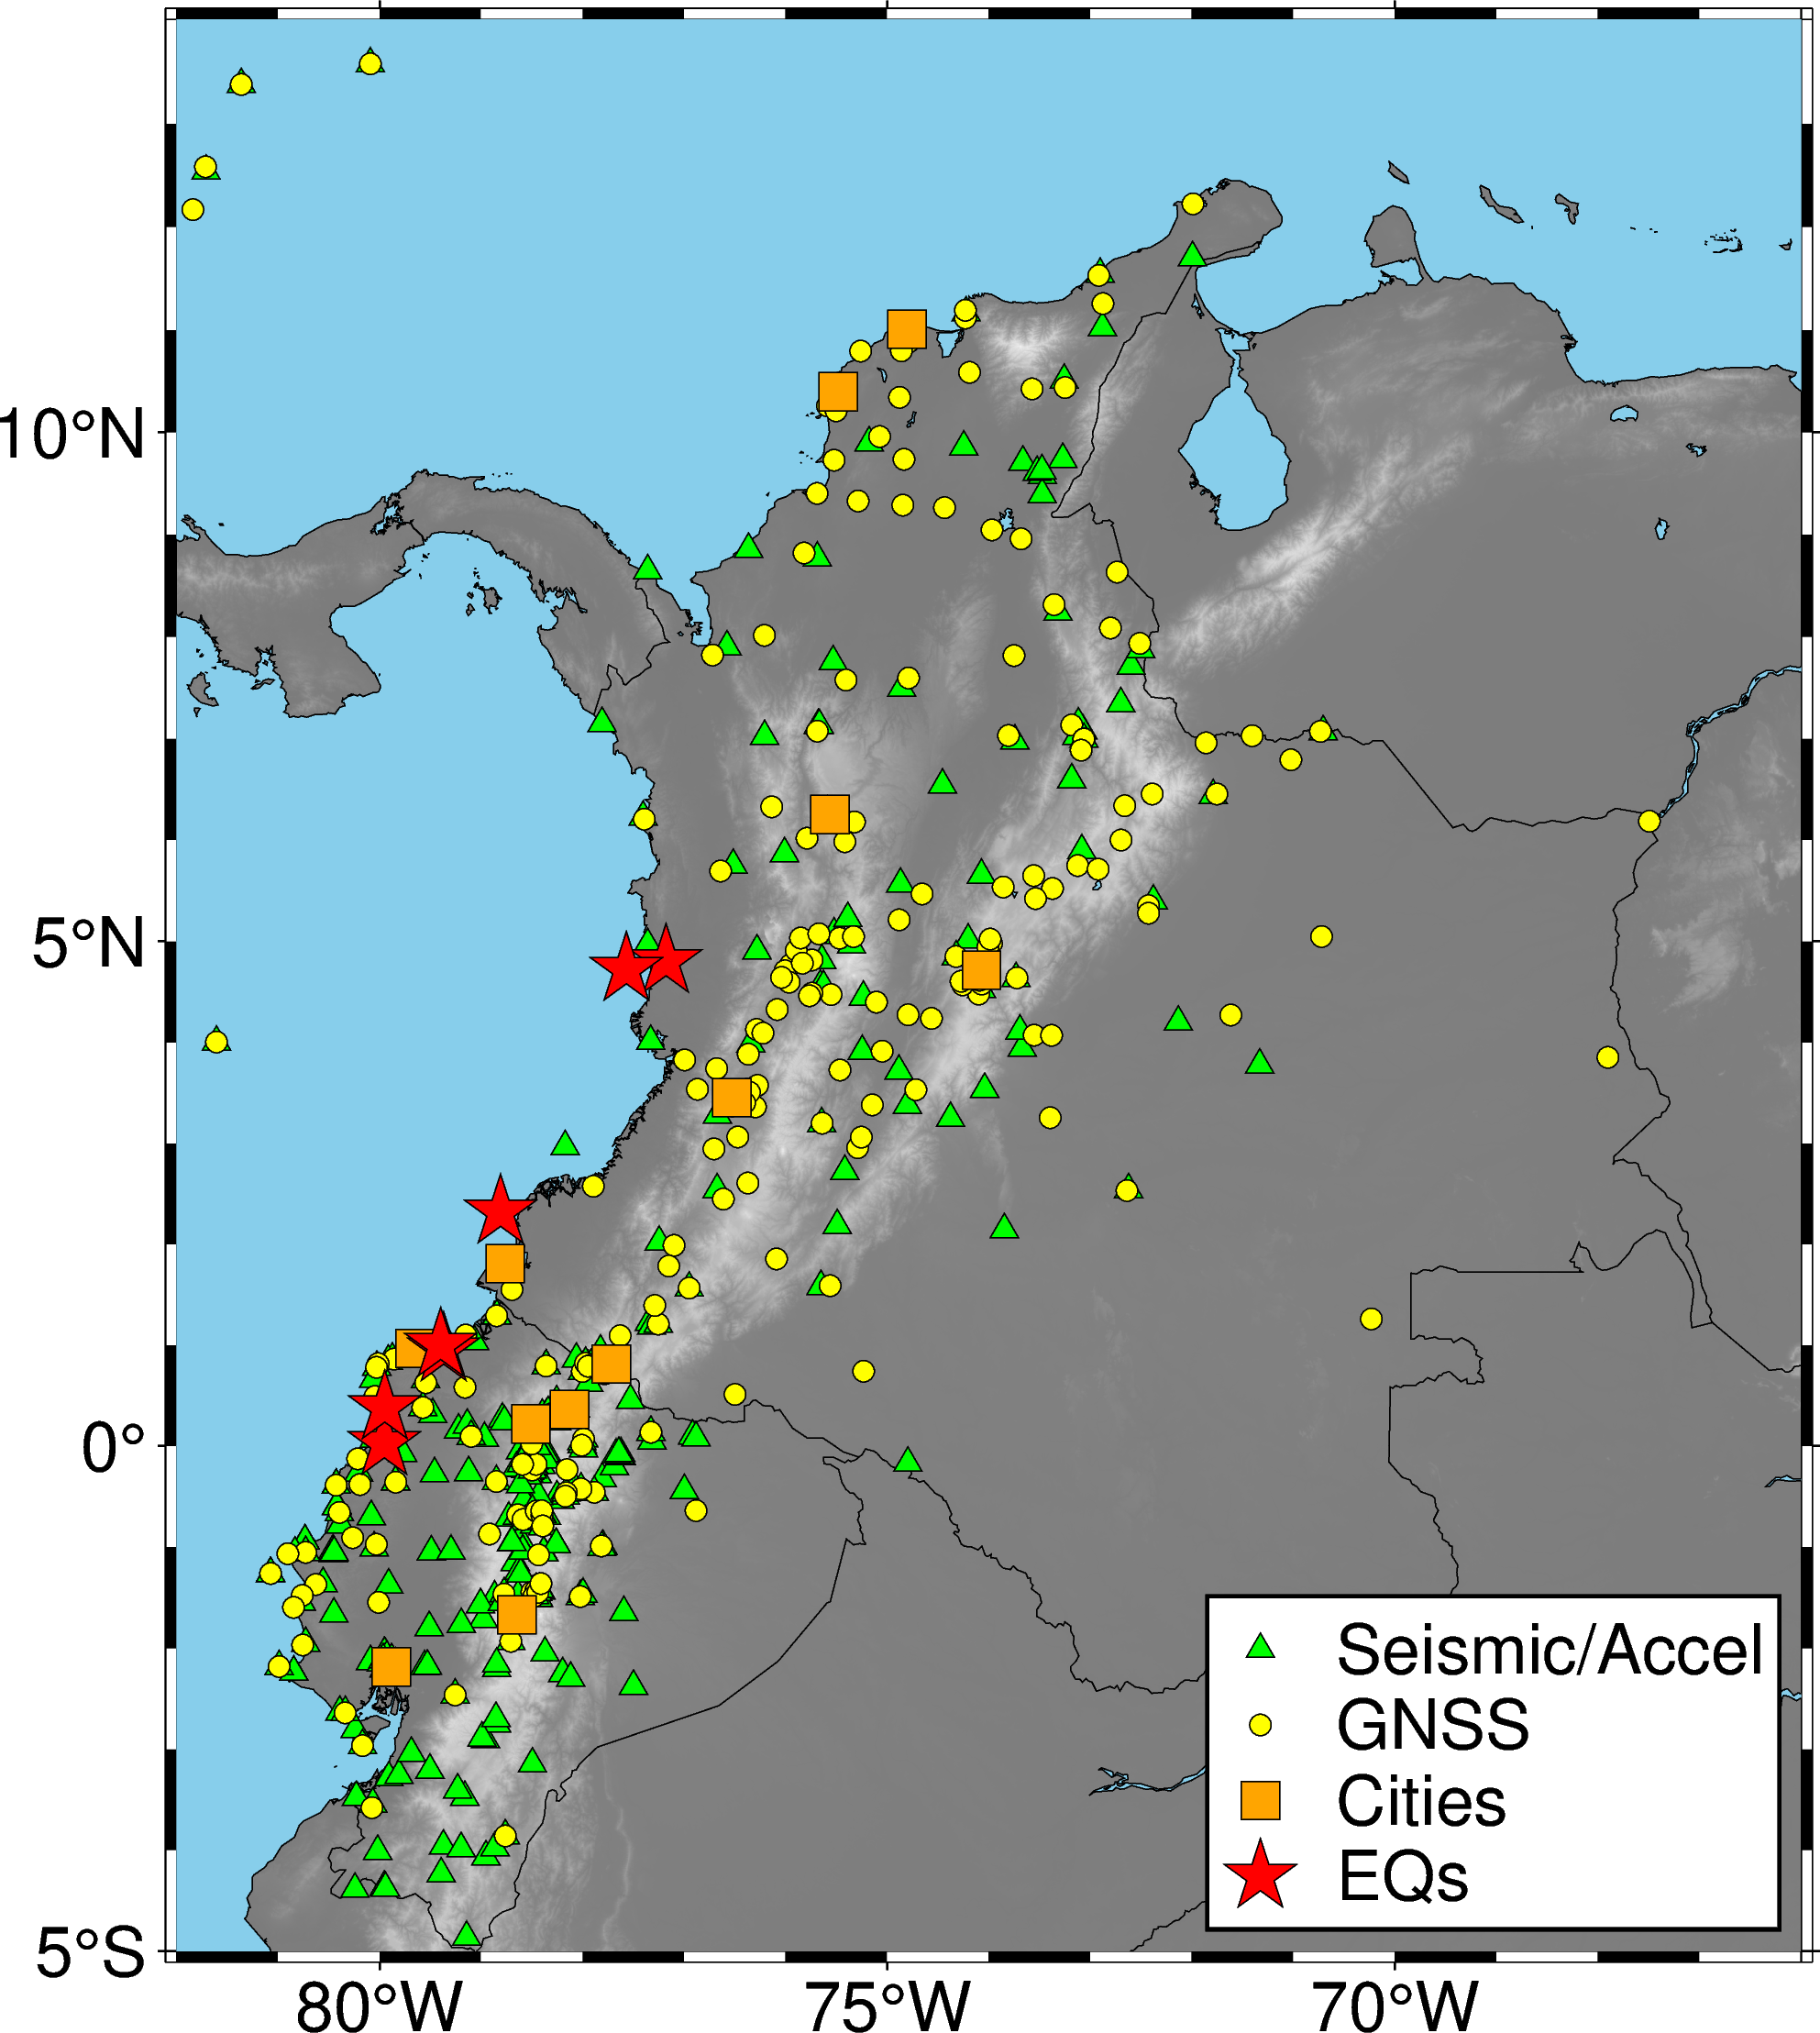

In [13]:
# Build figure using pyGMT
projection = "M-71.5/8/15c"
fig = pygmt.Figure()
with pygmt.config(FONT_ANNOT_PRIMARY="18p,Helvetica,black"):
    fig.basemap(projection=projection, region=[min_lon,max_lon,min_lat,max_lat], frame=True)
    fig.grdimage(grid=grid,cmap="gray")
    fig.coast(shorelines=True, water="skyblue", borders=1)
    #plot the seismic sites
    fig.plot(x=dfS.lon, y=dfS.lat, style="t0.3c", color="green", pen="black", label="Seismic/Accel")
    #plot the gnss sites
    fig.plot(x=df.lon, y=df.lat, style="c0.2c", color="yellow", pen="black", label="GNSS")
    #plot the earthquakes used in this study. 
    fig.plot(x=cities.Longitude, y=cities.Latitude, style="s0.5c", color="orange", pen="black", label="Cities")
    fig.plot(x=eqs.Longitude, y=eqs.Latitude, style="a0.7c", color="red", pen="black", label="EQs")
    #plot the cities used
    fig.legend(position="JBR+jBR+o0.2c", box="+gwhite+p1p")
    fig.show()

In [10]:
# If you want to save this in a different format
save_filename="2Figure1"+".png"
fig.savefig(save_filename)